In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Directories
train_dir = "DataSet_V1_8020/train"
val_dir = "DataSet_V1_8020/val"
test_dir = "DataSet_V1_8020/test"

# Rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
# Train data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(299, 299),
    class_mode="categorical",
    shuffle=True  # Ensure shuffling
)

# Validation data
val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    batch_size=32,
    target_size=(299, 299),
    class_mode="categorical"
)

# Test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(299, 299),
    class_mode="categorical",
    shuffle=False  # No need to shuffle test data
)

print(f"Train dataset size: {train_data.samples}")
print(f"Validation dataset size: {val_data.samples}")
print(f"Test dataset size: {test_data.samples}")

Found 4434 images belonging to 14 classes.
Found 1115 images belonging to 14 classes.
Found 1393 images belonging to 14 classes.
Train dataset size: 4434
Validation dataset size: 1115
Test dataset size: 1393


In [7]:
# Steps per epoch
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

# Number of classes
num_classes = train_data.num_classes
print(f"Number of classes: {num_classes}")

# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base model

# 2. Build custom model
inputs = tf.keras.layers.Input(shape=(299, 299, 3), name="input-layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output-layer")(x)
model = tf.keras.Model(inputs, outputs)

# 3. Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Smaller learning rate
    metrics=["accuracy"]
)

# 4. Train the model
history = model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps
)

Number of classes: 14
Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1110s 8s/step - accuracy: 0.2910 - loss: 2.3222 - val_accuracy: 0.6167 - val_loss: 1.6377
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5625 - loss: 1.5604 - val_accuracy: 0.7778 - val_loss: 1.4989
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1059s 8s/step - accuracy: 0.6635 - loss: 1.4978 - val_accuracy: 0.7886 - val_loss: 1.1587
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7812 - loss: 1.2993 - val_accuracy: 0.8519 - val_loss: 1.0379
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1044s 8s/step - accuracy: 0.7874 - loss: 1.0789 - val_accuracy: 0.8309 - val_loss: 0.8993
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7500 - loss: 1.1302 - val_accuracy: 0.8148 - val_loss: 0.9555
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1091s 8s/step - accuracy: 0.8347 - loss: 0.8419 - val_accuracy: 0.8428 - val_loss: 0.7500
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.781

In [8]:
# 5. Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy:.2f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 327s 7s/step - accuracy: 0.8522 - loss: 0.6105
Test accuracy: 0.86


In [9]:
# 6. Save the model
model.save("BirdSpecies_V1_8020.h5")

Found 1393 images belonging to 14 classes.


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 1156s 25s/step


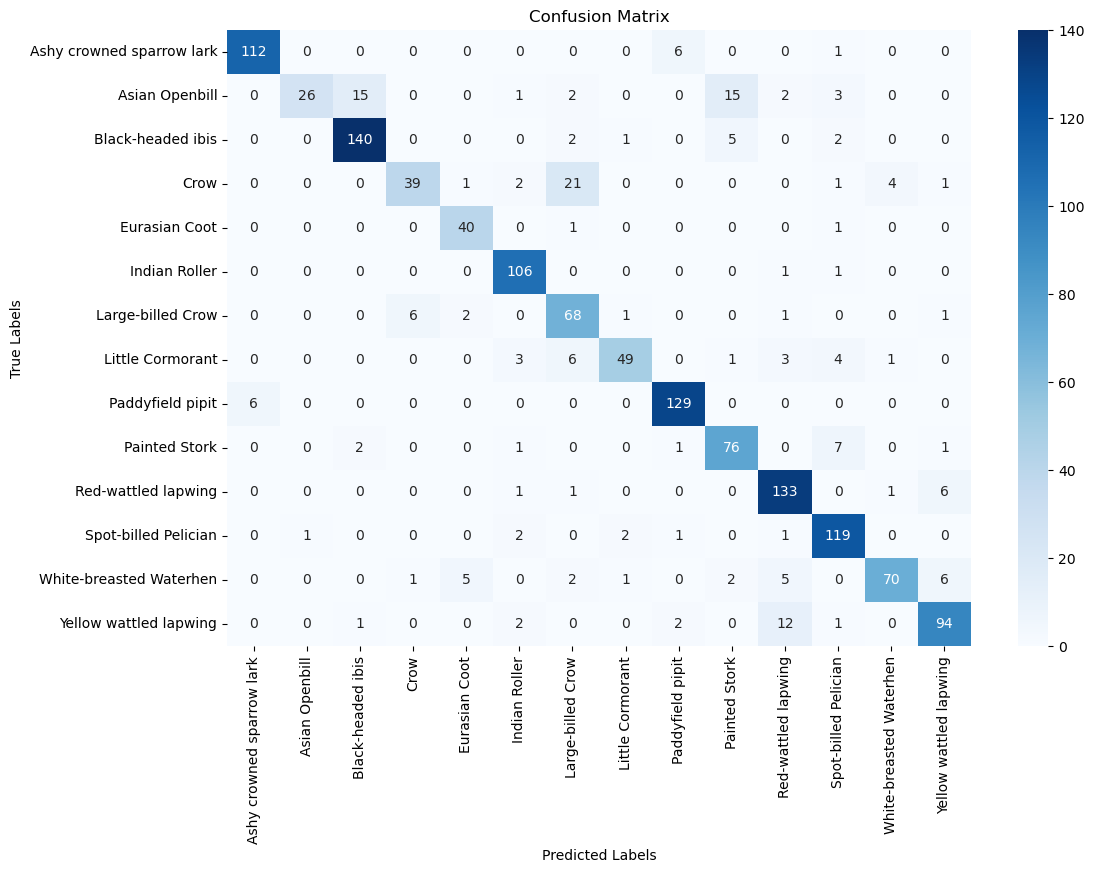

Classification Report:
                            precision    recall  f1-score   support

Ashy crowned sparrow lark       0.95      0.94      0.95       119
           Asian Openbill       0.96      0.41      0.57        64
        Black-headed ibis       0.89      0.93      0.91       150
                     Crow       0.85      0.57      0.68        69
            Eurasian Coot       0.83      0.95      0.89        42
            Indian Roller       0.90      0.98      0.94       108
        Large-billed Crow       0.66      0.86      0.75        79
         Little Cormorant       0.91      0.73      0.81        67
         Paddyfield pipit       0.93      0.96      0.94       135
            Painted Stork       0.77      0.86      0.81        88
      Red-wattled lapwing       0.84      0.94      0.89       142
     Spot-billed Pelician       0.85      0.94      0.89       126
  White-breasted Waterhen       0.92      0.76      0.83        92
   Yellow wattled lapwing       0.86 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
model = load_model('BirdSpecies_V1_8020.h5')

# Path to test data
test_dir = r'E:\CAPSTONE\Bird_Species_Classification\DataSet_V1_8020\test'

# Image data generator for preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(299, 299),  # Adjust size as per your model's input
    batch_size=32,
    class_mode='categorical',  # Use 'binary' if you have two classes
    shuffle=False  # Do not shuffle to match predictions with true labels
)

# Get class indices
class_indices = test_data.class_indices
class_labels = list(class_indices.keys())

# Predict on test data
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)
